In [72]:
import pandas as pd
import numpy as np
from lib import masters_data_analytics_lib as mlib
from lib import stats as stats

In [150]:
## City
city = "london"
search_term = "E1 6AN"

##
## LOAD ALL THE DATA FILES
##
## London Post Codes
sd_london_postcodes_file = "./data/streamlit_{}_postcodes_oa.csv".format(city)
sd_london_population_oa_file = "./data/streamlit_{}_population_oa.csv".format(city)
sd_london_household_oa_file = "./data/streamlit_{}_household_population_oa.csv".format(city)
sd_london_qualification_oa_file = "./data/streamlit_{}_qualifictation_population_oa.csv".format(city)

sd_london_population_oa_df   = mlib.csv_to_dataframe(sd_london_population_oa_file)
sd_london_postcodes_df = mlib.csv_to_dataframe(sd_london_postcodes_file)
sd_london_household_oa_df   = mlib.csv_to_dataframe(sd_london_household_oa_file)
sd_london_qualification_oa_df   = mlib.csv_to_dataframe(sd_london_qualification_oa_file) 


In [151]:
try:
    OAcode = sd_london_postcodes_df.loc[sd_london_postcodes_df["Post_Code"] == search_term]["OAcode"].values[0]
except:
    raise Exception("Unable to find post code {}".format(search_term))

other_post_codes = sd_london_postcodes_df.loc[sd_london_postcodes_df["OAcode"] == OAcode]["Post_Code"].to_numpy()
other_post_codes = np.delete(other_post_codes, np.where(other_post_codes == search_term))
number_of_boroughs = len(sd_london_postcodes_df["borough"].unique())


## Obtain the ward_name from the OACode
ward_name = sd_london_postcodes_df.loc[sd_london_postcodes_df["OAcode"] == OAcode]["WARD_NAME"].values[0]
borough   = sd_london_postcodes_df.loc[sd_london_postcodes_df['OAcode'] == OAcode]["borough"].values[0]

other_wards = sd_london_postcodes_df.loc[sd_london_postcodes_df["borough"] == borough]["WARD_NAME"]
other_wards = other_wards.unique()
other_wards = np.delete(other_wards, np.where(other_wards == borough))

post_code_search_longitude = sd_london_postcodes_df.loc[sd_london_postcodes_df["Post_Code"] == search_term]["longitude"].to_numpy()
post_code_search_latitude = sd_london_postcodes_df.loc[sd_london_postcodes_df["Post_Code"] == search_term]["latitude"].to_numpy()

pc_longitudes = sd_london_postcodes_df.loc[sd_london_postcodes_df["borough"] == borough]["longitude"].to_numpy()
pc_latitudes  = sd_london_postcodes_df.loc[sd_london_postcodes_df["borough"] == borough]["latitude"].to_numpy()


In [152]:
### Stats

###
### Population
###
pop_all_stats	  = stats.generate_stats(sd_london_population_oa_df, borough, ward_name, OAcode, "All")
pop_male_stats	  = stats.generate_stats(sd_london_population_oa_df, borough, ward_name, OAcode, "Males")
pop_female_stats  = stats.generate_stats(sd_london_population_oa_df, borough, ward_name, OAcode, "Females")
pop_density_stats = stats.generate_stats(sd_london_population_oa_df, borough, ward_name, OAcode, "DensityPPH")


In [155]:
### Male female ratio
## OA
pop_male_female_oa_total =pop_male_stats["oacode_sum"] + pop_female_stats["oacode_sum"]
pop_male_oa_ratio = round(pop_male_stats["oacode_sum"]/pop_male_female_oa_total * 100,0)
pop_female_oa_ratio = round(pop_female_stats["oacode_sum"]/pop_male_female_oa_total * 100,0)
print("OA M:{} F:{}".format(pop_male_oa_ratio, pop_female_oa_ratio))

## Ward
pop_male_female_ward_total =pop_male_stats["ward_sum"] + pop_female_stats["ward_sum"]
pop_male_ward_ratio = round(pop_male_stats["ward_sum"]/pop_male_female_oa_total * 100,0)
pop_female_ward_ratio = round(pop_female_stats["ward_sum"]/pop_male_female_oa_total * 100,0)
print("Ward M:{} F:{}".format(pop_male_ward_ratio, pop_female_ward_ratio))

## Borough
pop_male_female_borough_total = pop_male_stats["borough_sum"] + pop_female_stats["borough_sum"]
pop_male_borough_ratio = round(pop_male_stats["borough_sum"]/pop_male_female_borough_total * 100,0)
pop_female_borough_ratio = round(pop_female_stats["borough_sum"]/pop_male_female_borough_total * 100,0)
print("Borough M:{} F:{}".format(pop_male_borough_ratio, pop_female_borough_ratio))

## Borough Average
pop_male_female_city_borough_total = pop_male_stats["city_sum"] + pop_female_stats["city_sum"]
pop_male_city_ratio = round(pop_male_stats["city_sum"]/pop_male_female_city_borough_total * 100,0)
pop_female_city_ratio = round(pop_female_stats["city_sum"]/pop_male_female_city_borough_total * 100,0)

print(pop_male_ratio)


OA M:64.0 F:36.0
Ward M:64.0 F:36.0
Borough M:55.0 F:45.0
55.0


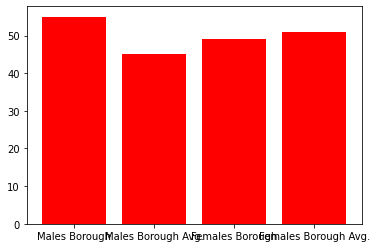

In [88]:
import matplotlib.pyplot as plt

# create data
x = ["Males Borough", "Males Borough Avg.", "Females Borough", "Females Borough Avg."]
y1 = [pop_male_borough_ratio, pop_female_borough_ratio, pop_male_city_ratio, pop_female_city_ratio]
  
# plot bars in stack manner
plt.bar(x, y1, color='r')
# plt.bar(x, y2, bottom=y1, color='b')
plt.show()

In [156]:
import pandas as pd
from statsmodels.graphics.mosaicplot import mosaic
import pylab
from itertools import product
import numpy as np


if 1==1:

    # pop_male_borough_ratio = 20
    # pop_male_city_ratio = 50
    # pop_female_borough_ratio = 80
    # pop_female_city_ratio = 50

    _data = [pop_male_oa_ratio
                    , pop_male_ward_ratio
                    , pop_male_borough_ratio
                    , pop_male_city_ratio
                    , pop_female_oa_ratio
                    , pop_female_ward_ratio
                    , pop_female_borough_ratio
                    , pop_female_city_ratio]

    
    
    options = ["male", "female"]
    names = ["OA", "ward", "borough", "borough average"]
    title = "Gender Population - OA, Borough and Borough Average"
    props = lambda key: {'color': 'orange' if 'male' in key else 'deepskyblue'}
    

    matrix = list(product(names, options))

    index = pd.MultiIndex.from_tuples(matrix, names=names)
    
    print(index)

    data = pd.Series(_data, index=index)

    mosaic(data, gap=0.01, title='Who knows multiple foregin languages? - Mosaic Chart')

    pylab.show()    
    
    
    
    
#     mosaic(data, gap=0.01, title='Gender Population - OA, Ward, Borough and Borough Average', properties=props)


#     mlib.save_plot(plot=pylab, path="c:/temp/", name="x.png", save_artefacts=True)
#     pylab.show()


ValueError: Length of names must match number of levels in MultiIndex.

MultiIndex([(             'OA',   'male'),
            (             'OA', 'female'),
            (           'ward',   'male'),
            (           'ward', 'female'),
            (        'borough',   'male'),
            (        'borough', 'female'),
            ('borough average',   'male'),
            ('borough average', 'female')],
           names=['male', 'female'])


<module 'pylab' from 'C:\\DISTRIBUTIONS\\Python\\Python3_10_2\\lib\\site-packages\\pylab.py'>

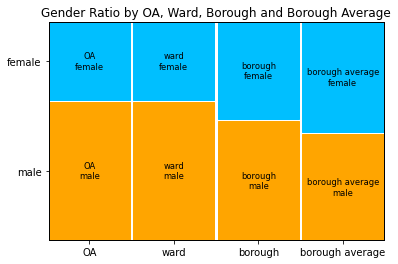

In [160]:
import pandas as pd
import pylab
import numpy as np
from statsmodels.graphics.mosaicplot import mosaic
from itertools import product

# options == male/female || yes/no
# names   == oa->boroufh avg || male/femal

def mekko_chart(data, options, names, title, props):
    """
    Makes a mekko chart
    """
    ## Changing the order of this will change the axis
    matrix = list(product(names, options))
    index = pd.MultiIndex.from_tuples(matrix, names=options)
    print(index)
    
    data_series = pd.Series(data, index=index)
    mosaic(data_series, gap=[0.01, 0.01], title=title, properties=props)
    
    return pylab

### Call the method

data = [pop_male_oa_ratio
      , pop_female_oa_ratio
      , pop_male_ward_ratio
      , pop_female_ward_ratio
      , pop_male_borough_ratio
      , pop_female_borough_ratio
      , pop_male_city_ratio
      , pop_female_city_ratio
]

options = ["male", "female"]
names = ["OA", "ward", "borough", "borough average"]
title = "Gender Population - OA, Borough and Borough Average"
props = lambda key: {'color': 'orange' if 'male' in key else 'deepskyblue'}
title = "Gender Ratio by OA, Ward, Borough and Borough Average"

mekko_chart(data=data, options=options, names=names, title=title, props=props)


MultiIndex([(  'male', 'yes'),
            (  'male',  'no'),
            ('female', 'yes'),
            ('female',  'no')],
           names=['male', 'female'])


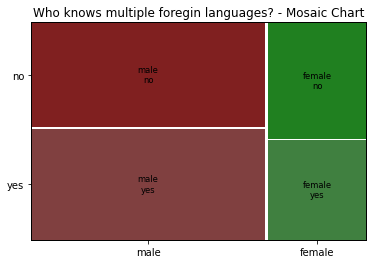

In [117]:
import pandas as pd
from statsmodels.graphics.mosaicplot import mosaic
import pylab
from itertools import product
import numpy as np

rand = np.random.random

speaks_mul_foreign_languages = list(product(['male', 'female'], ['yes', 'no']))

index = pd.MultiIndex.from_tuples(speaks_mul_foreign_languages, names=['male', 'female'])

print(index)

data = pd.Series(rand(4), index=index)

mosaic(data, gap=0.01, title='Who knows multiple foregin languages? - Mosaic Chart')

pylab.show()